# Double pendulum using Lagrange's equation

Defines a DoublePendulum class that is used to generate double pendulum plots from solving Lagrange's equations.

Revised by Joe Huang

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

## Euler-Lagrange equation

For a double pendulum, the Lagrangian with generalized coordinate $\phi_1$ and $\phi_2$ is

$\begin{align}
  \mathcal{L} = T - U = \frac12 (m_1 + m_2 ) L_1^2 \dot\phi_1^2 + m_2 L_1 L_2 \dot\phi_1 \dot\phi_2 \cos (\phi_1 - \phi_2)
  + \frac12 m_2 L_2^2 \dot\phi_2^2 + \cos \phi_1 L_1 (m_1 + m_2) g + \cos \phi_2 L_2 m_2 g
\end{align}$

The Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_1} = \frac{\partial\mathcal L}{\partial\phi_1}
 \quad\Longrightarrow\quad &
 (m_1 + m_2) L_1^2 \ddot \phi_1 + m_2 L_1 L_2 \ddot \phi_2 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_2 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= -m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - (m_1 + m_2) L_1 g \sin\phi_1 \\
   \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_2} = \frac{\partial\mathcal L}{\partial\phi_2}
 \quad\Longrightarrow\quad &
 m_2 L_2^2 \ddot \phi_2 + m_2 L_1 L_2 \ddot \phi_1 \cos(\phi_1 - \phi_2) -m_2 L_1 L_2 \dot\phi_1 \sin(\phi_1-\phi_2)(\dot\phi_1 - \dot \phi_2)\\
 &= m_2 L_1 L_2 \dot\phi_1 \phi_2 \sin(\phi_1 - \phi_2) - m_2 L_2 g \sin\phi_2.
\end{align}$


In [3]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [4]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    
    L1 : float
        length of the Upper pendulum
    L2 : float
        length of the lower pendulum
    g : float
        gravitational acceleration at the earth's surface 
    m1 : float
        mass of upper pendulum
    m2 : float
        mass of lower pendulum    

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1.,L2=1., m1=1., m2=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi_1/dt d^2phi_1/dt^2 dphi_2/dt d^2phi_2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t) y[1] = dphi_1/dt y[2]=phi_2(t) y[3] = dphi_2(t)
            
        Returns
        -------
        
        """
        return [y[1], (-self.g * (2.*self.m1+ self.m2)*np.sin(y[0])-self.m2*self.g*np.sin(y[0]-2*y[2])\
                       -2.*np.sin(y[0]-y[2])*self.m2*(y[3]**2*self.L2+y[1]**2 * self.L1 * np.cos(y[0]-y[2])))\
                /(self.L1 * (2.*self.m1 + self.m2 - self.m2*np.cos(2*y[0]-2*y[2]))), y[3],\
                (2*np.sin(y[0]-y[2])*((y[1]**2)*self.L1* (self.m1+ self.m2)+(self.m1+ self.m2)*self.g *np.cos(y[0])\
                                       +y[3]**2*self.L2*self.m2*np.cos(y[0]-y[2]))) \
                / (self.L2 * (2.*self.m1 +self.m2 - self.m2*np.cos(2*y[0]-2*y[2])))]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0,phi_2_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_1_dot,phi_2,phi_2_dot = solution.y

        return phi_1, phi_1_dot, phi_2, phi_2_dot

## Make simple pendulum plots 

In [5]:
# Labels for individual plot axes
phi_1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi_2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')
phi_1_dot_vs_time_labels = (r'$t$', r'$d\phi_1/dt(t)$')
phi_2_dot_vs_time_labels = (r'$t$', r'$d\phi_2/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

# Instantiate a pendulum 
p1 = DoublePendulum(L1=L1,L2=L2, m1=m1, m2=m2, g=g)


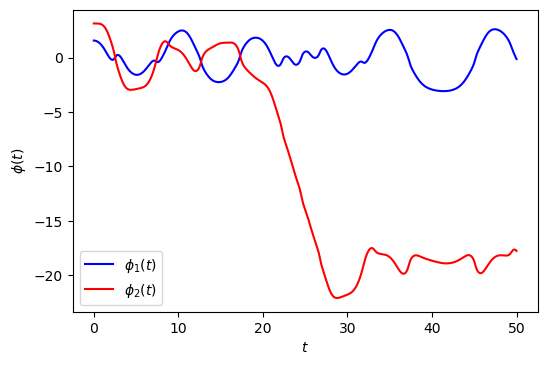

In [6]:
phi_1_0 = np.pi/2
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0,phi_2_0,phi_2_dot_0)

plt.subplot(1,1,1)
plt.plot(t_pts,phi_1,'b',label='$\phi_1(t)$')
plt.ylabel('$\phi_1(t)$')
plt.plot(t_pts,phi_2,'r',label='$\phi_2(t)$')
plt.xlabel('$t$')
plt.ylabel('$\phi(t)$')
plt.legend()
plt.show()